In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np


import wrangle as w
import evaluate as e
import model as m

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.feature_selection import f_regression 
from math import sqrt

#sklearn imports
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import RFE, SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.metrics import r2_score

# Project Description
Zillow is a real estate marketplace company. The Zillow dataset is utilized in this project to find drivers for property value for single family properties. 

# Project Description
Zillow is a real estate marketplace company. The Zillow dataset is utilized in this project to find drivers for property value for single family properties. 

# Project Goal

* Discover drivers of property value in the Zillow dataset. 
* Use drivers to develop a machine learning model to predict the property value for a single family property.
* Property value is defined as an estimated value for a property.
* This information could be used to further our understanding of which elements contribute to the value of a property.

# Initial Thoughts

My initial hypothesis is that drivers of churn will be elements such as 'area_sqft', 'bathrooms', 'bedroom', 'fips', 'pool', 'year'.

# Acquire
* Aquire dataset from Codeup database
* It contained 52442 rows and 7 columns before cleaning
* Each row represents a property at Zillow
* Each column represents a feature of those properties

# Prepare
- Prepare Actions:
    * Filtered columns that did not contain useful information
    * Renamed columns to promote readability
    * Checked for nulls in the data. The following columns contained nulls: 
        - 'pool' column, which were set to 0 (0 representing that the home did not have a pool)
        - 'year' (116 nulls)
        - 'area_sqft' (82 nulls), and property_value (1 null) columns, these rows were dropped  
    * Checked that column data types were appropriate
    * Added automatic_payment column, which divides the four payment types in payment_type column into two categories: automatic or non-automatic
    * Removed features:
        - customer_id            
        - senior_citizen                         
        - phone_service            
        - monthly_charges        
        - total_charges          
        - payment_type
    * Encoded categorical variables
    * Split data into train, validate and test (approx. 60/20/20), stratifying on 'churn'
    * Outliers have not been removed for this iteration of the project

In [2]:
# retrieve the data from database or directory 
df = w.get_data()

In [3]:
df.isnull().sum()

area_sqft          82
bathrooms           0
bedroom             0
fips                0
year              116
property_value      1
dtype: int64

In [4]:
df.shape

(52442, 6)

In [5]:
# clean data, remove nulls, outliers and rename columns
df = w.clean_zillow()

826 outliers removed from area_sqft.
936 outliers removed from bathrooms.
482 outliers removed from bedroom.
25 outliers removed from year.
839 outliers removed from property_value.
0 outliers removed from full_bath.

Total of 3108 outliers removed.


In [6]:
# split the data into train, validate, test
train, validate, test = w.split_data(df)

In [7]:
df.columns

Index(['area_sqft', 'bathrooms', 'bedroom', 'fips', 'year', 'property_value',
       'full_bath', 'orange', 'ventura'],
      dtype='object')

In [9]:
features = ['area_sqft', 'bathrooms', 'bedroom', 'year', 'full_bath','orange', 'ventura'] # 311745.604323	0.412103
target = "property_value"

## 3 std 265829.593614	0.357482

In [10]:
# split the train, validate, test into x and y 

x_train, x_validate, x_test  = train[features], validate[features], test[features]
y_train, y_validate, y_test = train[target], validate[target], test[target]

In [11]:
x_train

,area_sqft,bathrooms,bedroom,year,full_bath,orange,ventura
28627,1624.0,2.0,2.0,1971.0,1,1,0
33500,1430.0,2.0,3.0,1924.0,1,0,0
38701,2859.0,3.0,4.0,2004.0,1,0,0
31888,1501.0,2.0,3.0,1930.0,1,0,0
13279,1680.0,2.0,3.0,1972.0,1,1,0
...,...,...,...,...,...,...,...
27772,1554.0,2.0,3.0,1986.0,1,0,0
49310,1282.0,2.0,4.0,1971.0,1,0,0
33258,1219.0,2.0,3.0,1953.0,1,0,0
9656,1975.0,2.0,4.0,1941.0,1,0,0


# scale data 

In [12]:
# scale the x 
x_train_scaled, x_validate_scaled, x_test_scaled = w.mm_scale(x_train, x_validate, x_test)

In [13]:
# feature engineerin KBest 

In [14]:
m.select_kbest(x_train_scaled, y_train, 6)

Index(['area_sqft', 'bathrooms', 'bedroom', 'year', 'full_bath', 'orange'], dtype='object')

In [15]:
m.select_kbest(x_train_scaled, y_train1, )

NameError: name 'y_train1' is not defined

In [49]:
# Rfe
m.rfe(x_train_scaled,y_train, k=6)

(['area_sqft', 'bathrooms', 'bedroom', 'year', 'full_bath', 'orange'],
            rfe_ranking
 area_sqft            1
 bathrooms            1
 bedroom              1
 year                 1
 full_bath            1
 orange               1
 ventura              2)

In [50]:
m.rfe(x_train_scaled,y_train, k=4)

(['area_sqft', 'bathrooms', 'bedroom', 'year'],
            rfe_ranking
 area_sqft            1
 bathrooms            1
 bedroom              1
 year                 1
 orange               2
 full_bath            3
 ventura              4)

In [51]:
def get_baseline(y_train):
    x_train_scaled["yhat_baseline"] = y_train.mean()
    return df

In [90]:
# create baseline
baseline = y_train.mean()
baseline

420932.4995597101

In [91]:
baseline_array = np.repeat(baseline, len(train))
baseline_array[:5]

array([420932.49955971, 420932.49955971, 420932.49955971, 420932.49955971,
       420932.49955971])

In [92]:
rmse, r2 = m.metrics_reg(y_train, baseline_array)
rmse, r2

(320706.78325261164, 0.0)

In [93]:
metrics_df = pd.DataFrame(data=[
    {
        'model':'baseline',
        'rmse':rmse,
        'r2':r2
    }
    
])
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.0


# OLS 

In [94]:
#intial ML model
lr1 = LinearRegression()

#make it
rfe = RFE(lr1, n_features_to_select=4)

#fit it
rfe.fit(x_train_scaled, y_train)

#use it on train
x_train_rfe1 = rfe.transform(x_train_scaled)

# #use it on validate
x_val_rfe1 = rfe.transform(x_validate_scaled)

In [95]:
#intial ML model
lr1 = LinearRegression()

#make it
rfe = RFE(lr1, n_features_to_select=3)

#fit it
rfe.fit(x_train_scaled, y_train)

#use it on train
x_train_rfe = rfe.transform(x_train_scaled)

# #use it on validate
x_val_rfe = rfe.transform(x_validate_scaled)

In [96]:
print('selected top feature:', rfe.get_feature_names_out())

selected top feature: ['area_sqft' 'bathrooms' 'bedroom']


In [97]:
#fit the thing
lr1.fit(x_train_rfe, y_train)

#use the thing (make predictions)
pred_lr1 = lr1.predict(x_train_rfe)
pred_val_lr1 = lr1.predict(x_val_rfe)

In [98]:
#train
m.metrics_reg(y_train, pred_lr1)


(269571.42245951685, 0.29346869542447607)

In [99]:
#validate
rmse, r2 = m.metrics_reg(y_validate, pred_val_lr1)
rmse, r2

(270118.8954353681, 0.29467129023715855)

In [100]:
#add to my metrics df
metrics_df.loc[1] = ['ols_1', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.000000
1,ols_1,270118.895435,0.294671


In [101]:
#make it
lr2 = LinearRegression()

#fit it on our RFE features
lr2.fit(x_train_scaled, y_train)

#use it (make predictions)
pred_lr2 = lr2.predict(x_train_scaled)

#use it on validate
pred_val_lr2 = lr2.predict(x_validate_scaled)

In [102]:
m.metrics_reg(y_train, pred_lr2)

(267411.66104258597, 0.30474456623172264)

In [103]:
# validate
rmse, r2 = m.metrics_reg(y_validate, pred_val_lr2)
rmse, r2

(267539.6325106283, 0.308076813962438)

In [104]:
metrics_df.loc[2] = ['ols', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.000000
1,ols_1,270118.895435,0.294671
2,ols,267539.632511,0.308077


# Model LassoLars

In [105]:
#make it
lars = LassoLars(alpha=1)

#fit it
lars.fit(x_train_scaled, y_train)

#use it
pred_lars = lars.predict(x_train_scaled)
pred_val_lars = lars.predict(x_validate_scaled)

In [106]:
pd.Series(lars.coef_, index=lars.feature_names_in_)

area_sqft    1.078071e+06
bathrooms    2.542960e+05
bedroom     -2.449655e+05
year        -1.598991e+05
full_bath   -3.703424e+04
orange       5.732662e+04
ventura      2.622755e+04
dtype: float64

In [107]:
lr2.coef_

array([1079857.67257744,  256882.81203196, -247310.34304631,
       -162807.50274658,  -37208.01078916,   57992.99012846,
         27307.02692092])

In [108]:
#train
m.metrics_reg(y_train, pred_lars)

(267412.4407583894, 0.3047405117904366)

In [109]:
#validate
rmse, r2 = m.metrics_reg(y_validate, pred_val_lars)
rmse, r2

(267559.4353395876, 0.3079743802147481)

In [110]:
#add to my metrics df
metrics_df.loc[3] = ['lars', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.000000
1,ols_1,270118.895435,0.294671
2,ols,267539.632511,0.308077
3,lars,267559.435340,0.307974


# Poly

In [111]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=3)

# fit and transform X_train_scaled
x_train_degree2 = pf.fit_transform(x_train_scaled)

# transform X_validate_scaled & X_test_scaled
x_validate_degree2 = pf.transform(x_validate_scaled)
x_test_degree2 = pf.transform(x_test_scaled)

In [112]:
#make it
pr = LinearRegression()

#fit it
pr.fit(x_train_degree2, y_train)

#use it
pred_pr = pr.predict(x_train_degree2)
pred_val_pr = pr.predict(x_validate_degree2)


In [113]:
#train
m.metrics_reg(y_train, pred_pr)

(259185.7770056417, 0.34686036415060617)

In [114]:
#validate
rmse, r2 = m.metrics_reg(y_validate, pred_val_pr)
rmse, r2

(260538.39283914387, 0.3438168241734928)

In [115]:
#add to my metrics df
metrics_df.loc[4] = ['poly_2', rmse, r2]
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.000000
1,ols_1,270118.895435,0.294671
2,ols,267539.632511,0.308077
3,lars,267559.435340,0.307974
4,poly_2,260538.392839,0.343817


# GLM

In [116]:
#make it
glm = TweedieRegressor(power=0, alpha=0)

#fit it
glm.fit(x_train_scaled, y_train)

#use it
pred_glm = glm.predict(x_train_scaled)
pred_val_glm = glm.predict(x_validate_scaled)

In [117]:
#train
m.metrics_reg(y_train, pred_glm)

(267411.6610425867, 0.30474456623171886)

In [118]:
#validate
rmse, r2 = m.metrics_reg(y_validate, pred_val_glm)
rmse, r2

(267539.63289964997, 0.30807681195022696)

In [119]:
metrics_df.loc[5] = ['glm',rmse,r2]
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.000000
1,ols_1,270118.895435,0.294671
2,ols,267539.632511,0.308077
3,lars,267559.435340,0.307974
4,poly_2,260538.392839,0.343817
5,glm,267539.632900,0.308077


# Evaluate on best model

In [120]:
#use it
pred_test = pr.predict(x_test_degree2)
pred_test

array([710456.875  , 748657.125  , 393804.125  , ..., 554579.0625 ,
       334001.53125, 458171.3125 ])

In [121]:
rmse, r2 = m.metrics_reg(y_test, pred_test)
rmse, r2 

(265829.59361405007, 0.3574821883876885)

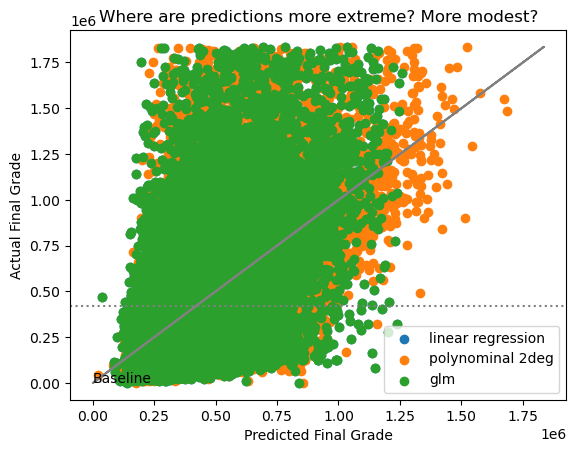

In [122]:
plt.scatter(pred_lr2, y_train, label='linear regression')
plt.scatter(pred_pr, y_train, label='polynominal 2deg')
plt.scatter(pred_glm, y_train, label='glm')
plt.plot(y_train, y_train, label='_nolegend_', color='grey')

plt.axhline(baseline, ls=':', color='grey')
plt.annotate("Baseline", (65, 81))

plt.title("Where are predictions more extreme? More modest?")
plt.ylabel("Actual Final Grade")
plt.xlabel("Predicted Final Grade")
plt.legend()

plt.show()

In [123]:
metrics_df.loc[6] = ['test',rmse,r2]
metrics_df

,model,rmse,r2
0,baseline,320706.783253,0.000000
1,ols_1,270118.895435,0.294671
2,ols,267539.632511,0.308077
3,lars,267559.435340,0.307974
4,poly_2,260538.392839,0.343817
5,glm,267539.632900,0.308077
6,test,265829.593614,0.357482
